In [102]:
import re
import pandas as pd

In [103]:
f = open('WhatsApp Chat with IT(class information).txt','r', encoding='utf-8')

In [104]:
data = f.read()

In [105]:
print(data)

9/7/24, 10:03 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
3/19/22, 12:40 PM - Sufyan Classmate created group "IT(class information)"
3/19/22, 12:40 PM - You were added
9/6/24, 7:34 PM - Zawar Uni: <Media omitted>
9/7/24, 8:07 PM - Sufyan Classmate: <Media omitted>
9/7/24, 8:07 PM - Sufyan Classmate: <Media omitted>
9/7/24, 8:07 PM - Sufyan Classmate: Jo students krnaa chah rhy hain wo yeh details bhej dain
JazakAllah
9/7/24, 8:48 PM - Sufyan Classmate: The number of students with their name, session, semester, ID card number & contact number shall be as follows:
CS: 20 student
IT: 20 Student
9/7/24, 8:49 PM - Sufyan Classmate: Group ma bhej dain sb
JazakAllah
9/7/24, 8:53 PM - Sufi Uni: This message was deleted
9/7/24, 8:53 PM - Sufi Uni: This message was deleted
9/7/24, 8:54 PM - Sufyan Classmate: Era proper details txt form ma likh kr bhej dain ta k ma srf copy paste kru😅
JazakAllah
9

In [106]:
pattern = r'\d{1,2}/\d{1,2}/\d{1,2}, \s?\d{1,2}:\d{2}\s?(?:AM|PM)? - '

In [107]:
messages= re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Sufyan Classmate created group "IT(class information)"\n',
 'You were added\n',
 'Zawar Uni: <Media omitted>\n',
 'Sufyan Classmate: <Media omitted>\n',
 'Sufyan Classmate: <Media omitted>\n',
 'Sufyan Classmate: Jo students krnaa chah rhy hain wo yeh details bhej dain\nJazakAllah\n',
 'Sufyan Classmate: The number of students with their name, session, semester, ID card number & contact number shall be as follows:\nCS: 20 student\nIT: 20 Student\n',
 'Sufyan Classmate: Group ma bhej dain sb\nJazakAllah\n',
 'Sufi Uni: This message was deleted\n',
 'Sufi Uni: This message was deleted\n',
 'Sufyan Classmate: Era proper details txt form ma likh kr bhej dain ta k ma srf copy paste kru😅\nJazakAllah\n',
 'Zahid Uni: Happy birthday 🥳🎂 @923444563700 Allah pak slamat rakhy 🤲❤️\n',
 'Zawar Uni: Happy birthday 🎂🎂🎂 machine\n',
 'Mehran Bhai Uni: Jazak 

In [108]:
dates = re.findall(pattern, data)
dates

['9/7/24, 10:03\u202fPM - ',
 '3/19/22, 12:40\u202fPM - ',
 '3/19/22, 12:40\u202fPM - ',
 '9/6/24, 7:34\u202fPM - ',
 '9/7/24, 8:07\u202fPM - ',
 '9/7/24, 8:07\u202fPM - ',
 '9/7/24, 8:07\u202fPM - ',
 '9/7/24, 8:48\u202fPM - ',
 '9/7/24, 8:49\u202fPM - ',
 '9/7/24, 8:53\u202fPM - ',
 '9/7/24, 8:53\u202fPM - ',
 '9/7/24, 8:54\u202fPM - ',
 '9/8/24, 11:19\u202fAM - ',
 '9/8/24, 11:19\u202fAM - ',
 '9/8/24, 11:23\u202fAM - ',
 '9/8/24, 11:24\u202fAM - ',
 '9/8/24, 11:25\u202fAM - ',
 '9/8/24, 11:38\u202fAM - ',
 '9/8/24, 11:39\u202fAM - ',
 '9/8/24, 11:48\u202fAM - ',
 '9/8/24, 12:20\u202fPM - ',
 '9/8/24, 5:44\u202fPM - ',
 '9/8/24, 5:44\u202fPM - ',
 '9/8/24, 8:13\u202fPM - ',
 '9/8/24, 8:13\u202fPM - ',
 '9/8/24, 8:14\u202fPM - ',
 '9/8/24, 8:15\u202fPM - ',
 '9/8/24, 9:01\u202fPM - ',
 '9/8/24, 9:14\u202fPM - ',
 '9/9/24, 9:45\u202fAM - ',
 '9/9/24, 9:45\u202fAM - ',
 '9/9/24, 9:45\u202fAM - ',
 '9/9/24, 9:46\u202fAM - ',
 '9/9/24, 9:46\u202fAM - ',
 '9/9/24, 9:46\u202fAM - ',
 '9/9/

In [109]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
#convert message_date type 
df['message_date'] = df['message_date'].str.strip()
df['message_date'] = df['message_date'].str.replace(' -$', '', regex=True)

df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p')

df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2024-09-07 22:03:00
1,"Sufyan Classmate created group ""IT(class infor...",2022-03-19 12:40:00
2,You were added\n,2022-03-19 12:40:00
3,Zawar Uni: <Media omitted>\n,2024-09-06 19:34:00
4,Sufyan Classmate: <Media omitted>\n,2024-09-07 20:07:00


In [110]:
#seprate users and message
users =[] 
messages = []
# Loop through each message in the 'user_message' column
for message in df['user_message']:
    # Use a regular expression to split the message by the first occurrence of "username:"
    entry = re.split(r'([\w\W]+?):\s', message)
    
    if entry[1:]:  # Check if there is a split and entry[1] exists (i.e., it's not a group message)
        users.append(entry[1])  # Append the username (entry[1]) to the 'users' list
        messages.append(entry[2])  # Append the message (entry[2]) to the 'messages' list
    else:  # If it's a group message or the split fails, handle it here
        users.append('group_notification')  # Set user as 'group_notification'
        messages.append(entry[0])  # The message is stored in entry[0]

# Add the extracted users and messages to the DataFrame
df['user'] = users
df['message'] = messages

# Drop the original 'user_message' column
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2024-09-07 22:03:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-03-19 12:40:00,group_notification,"Sufyan Classmate created group ""IT(class infor..."
2,2022-03-19 12:40:00,group_notification,You were added\n
3,2024-09-06 19:34:00,Zawar Uni,<Media omitted>\n
4,2024-09-07 20:07:00,Sufyan Classmate,<Media omitted>\n


In [111]:
df['year'] = df['date'].dt.year

In [112]:
df.head()

,date,user,message,year
0,2024-09-07 22:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,2022-03-19 12:40:00,group_notification,"Sufyan Classmate created group ""IT(class infor...",2022
2,2022-03-19 12:40:00,group_notification,You were added\n,2022
3,2024-09-06 19:34:00,Zawar Uni,<Media omitted>\n,2024
4,2024-09-07 20:07:00,Sufyan Classmate,<Media omitted>\n,2024


In [113]:
df['month'] = df['date'].dt.month_name()

In [114]:
df.head()

,date,user,message,year,month
0,2024-09-07 22:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,September
1,2022-03-19 12:40:00,group_notification,"Sufyan Classmate created group ""IT(class infor...",2022,March
2,2022-03-19 12:40:00,group_notification,You were added\n,2022,March
3,2024-09-06 19:34:00,Zawar Uni,<Media omitted>\n,2024,September
4,2024-09-07 20:07:00,Sufyan Classmate,<Media omitted>\n,2024,September


In [115]:
df['day'] = df['date'].dt.day

In [116]:
df['hour'] = df['date'].dt.hour

In [117]:
df['minute'] = df['date'].dt.minute

In [118]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-09-07 22:03:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,September,7,22,3
1,2022-03-19 12:40:00,group_notification,"Sufyan Classmate created group ""IT(class infor...",2022,March,19,12,40
2,2022-03-19 12:40:00,group_notification,You were added\n,2022,March,19,12,40
3,2024-09-06 19:34:00,Zawar Uni,<Media omitted>\n,2024,September,6,19,34
4,2024-09-07 20:07:00,Sufyan Classmate,<Media omitted>\n,2024,September,7,20,7


In [119]:
words = []
for message in df['message']:
    words.append(message.split())

In [120]:
len(words)

4191

In [121]:
from urlextract import URLExtract 
extractor = URLExtract()
urls =extractor.find_urls("Lets have a URL www.stackoverflow.com as example google.com")

In [122]:
urls

['www.stackoverflow.com', 'google.com']

In [123]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [124]:
len(links)

39

In [125]:
x=df['user'].value_counts().head()

In [126]:
import matplotlib.pyplot as plt

In [127]:
name = x.index
count = x.values

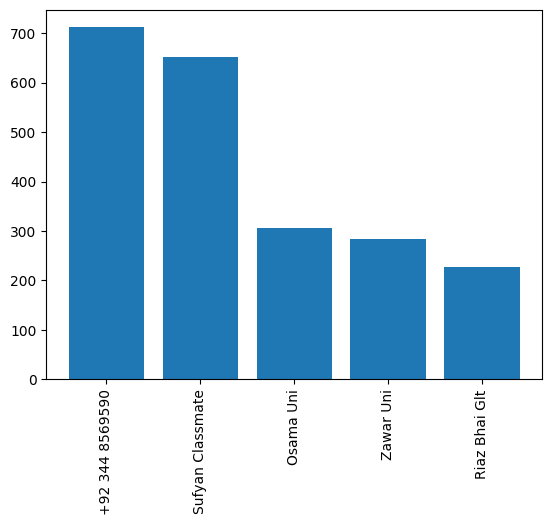

In [128]:
plt.bar(name, count)
plt.xticks(rotation ='vertical')
plt.show()

In [129]:
round((df['user'].value_counts() / df.shape[0]) * 100, 2) \
    .reset_index() \
    .rename(columns={'index': 'name', 'user': 'person'})

,person,count
0,+92 344 8569590,16.99
1,Sufyan Classmate,15.56
2,Osama Uni,7.30
3,Zawar Uni,6.75
4,Riaz Bhai Glt,5.42
5,Sundas Bajiiiiiiii,4.92
6,+92 342 3280338,3.82
7,+92 342 0522284,3.75
8,Zahid Uni,3.63
9,Sufi Uni,3.36


In [172]:
words = [] 
for message in df['message']:
    words.append(message.split())

In [176]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message']!='<Media omitted>\n']

In [177]:
temp.head()

,date,user,message,year,month,day,hour,minute
6,2024-09-07 20:07:00,Sufyan Classmate,Jo students krnaa chah rhy hain wo yeh details...,2024,September,7,20,7
7,2024-09-07 20:48:00,Sufyan Classmate,,2024,September,7,20,48
8,2024-09-07 20:49:00,Sufyan Classmate,Group ma bhej dain sb\nJazakAllah\n,2024,September,7,20,49
9,2024-09-07 20:53:00,Sufi Uni,This message was deleted\n,2024,September,7,20,53
10,2024-09-07 20:53:00,Sufi Uni,This message was deleted\n,2024,September,7,20,53


In [178]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()

In [179]:
words = [] 
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words: 
           words.append(word)

In [180]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,sb,238
1,class,173
2,😂,154
3,mam,149
4,message,137
5,gy,136
6,topic,126
7,sy,120
8,roll,116
9,=,114


In [184]:
import emoji

In [186]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [188]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,705
1,🤣,101
2,😅,51
3,🥲,31
4,🥹,27
...,...,...
108,🙅,1
109,♂,1
110,👌,1
111,🚶,1


In [190]:
df['month_num'] = df['date'].dt.month

In [193]:
timeline= df.groupby(['year','month_num', 'month']).count()['message'].reset_index()

In [194]:
timeline

,year,month_num,month,message
0,2022,3,March,2
1,2024,9,September,595
2,2024,10,October,844
3,2024,11,November,2750


In [199]:
time =[]
for i in range (timeline.shape[0]):
    time.append(timeline['month'][i]+" "+str(timeline['year'][i]))


In [200]:
timeline['time'] = time

In [201]:
timeline

,year,month_num,month,message,time
0,2022,3,March,2,March 2022
1,2024,9,September,595,September 2024
2,2024,10,October,844,October 2024
3,2024,11,November,2750,November 2024


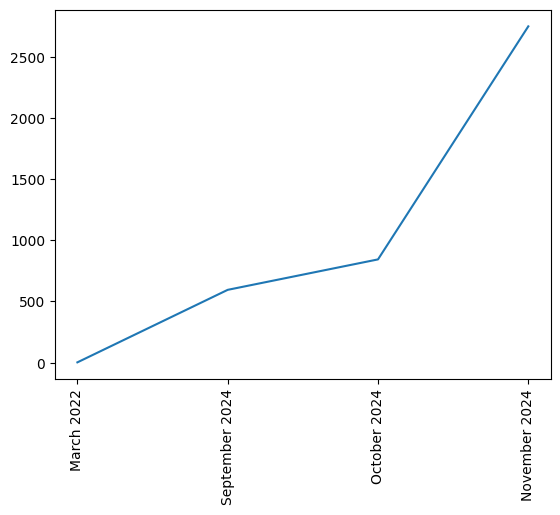

In [203]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [205]:
df['daily']=df['date'].dt.date

In [208]:
daily_timeline =df.groupby('daily').count()['message'].reset_index()

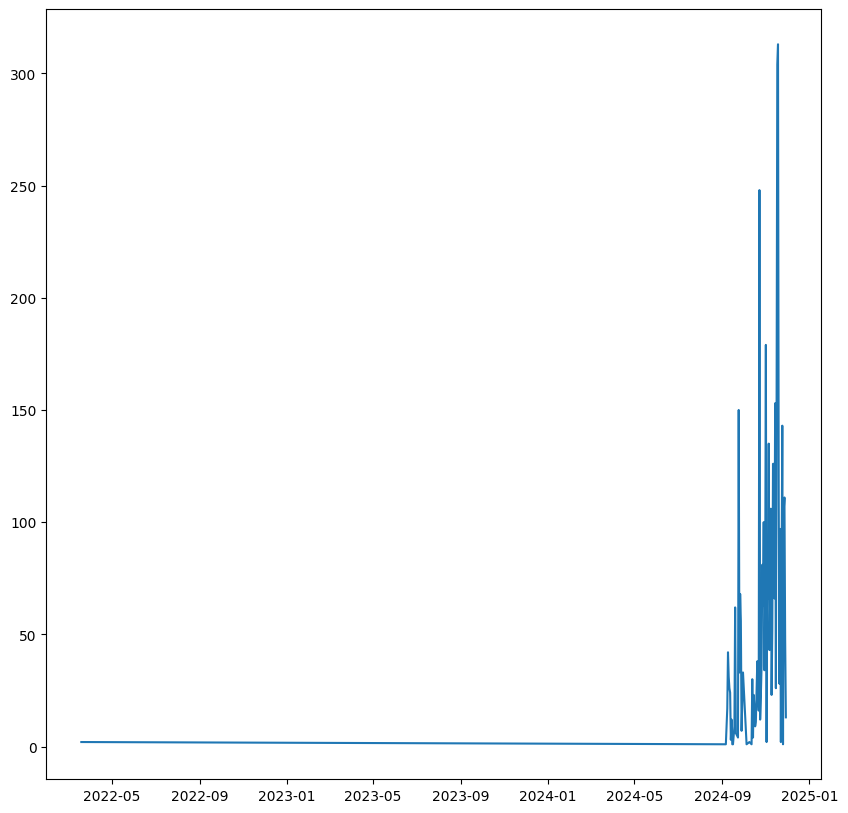

In [210]:
plt.figure(figsize =(10,10))
plt.plot(daily_timeline['daily'], daily_timeline['message'])

In [211]:
df['day_name'] = df['date'].dt.day_name()

In [213]:
df['day_name'] .value_counts()

day_name
Tuesday      795
Sunday       749
Monday       683
Wednesday    617
Thursday     603
Friday       426
Saturday     318
Name: count, dtype: int64

In [214]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour ==23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00')+ "-" + str(hour+1))
    else:
        period.append(str(hour)+ "-" + str(hour+1))
        

In [216]:
df['period'] = period

In [217]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,daily,day_name,period
2411,2024-11-12 17:20:00,+92 344 8569590,jo easypessa krna chahta kr da mry ise nbr py\n,2024,November,12,17,20,11,2024-11-12,Tuesday,17-18
1725,2024-11-04 14:18:00,+92 346 1080030,Trip kaha gay ga ?\n,2024,November,4,14,18,11,2024-11-04,Monday,14-15
246,2024-09-23 12:08:00,Riaz Bhai Glt,book ? IT series\n,2024,September,23,12,8,9,2024-09-23,Monday,12-13
1643,2024-11-03 09:32:00,Riaz Bhai Glt,Ap kehna kia chatay hu?🤔\n,2024,November,3,9,32,11,2024-11-03,Sunday,9-10
407,2024-09-25 15:10:00,Osama Uni,Link open ho rha hai lakn assignmt upload nhi ...,2024,September,25,15,10,9,2024-09-25,Wednesday,15-16


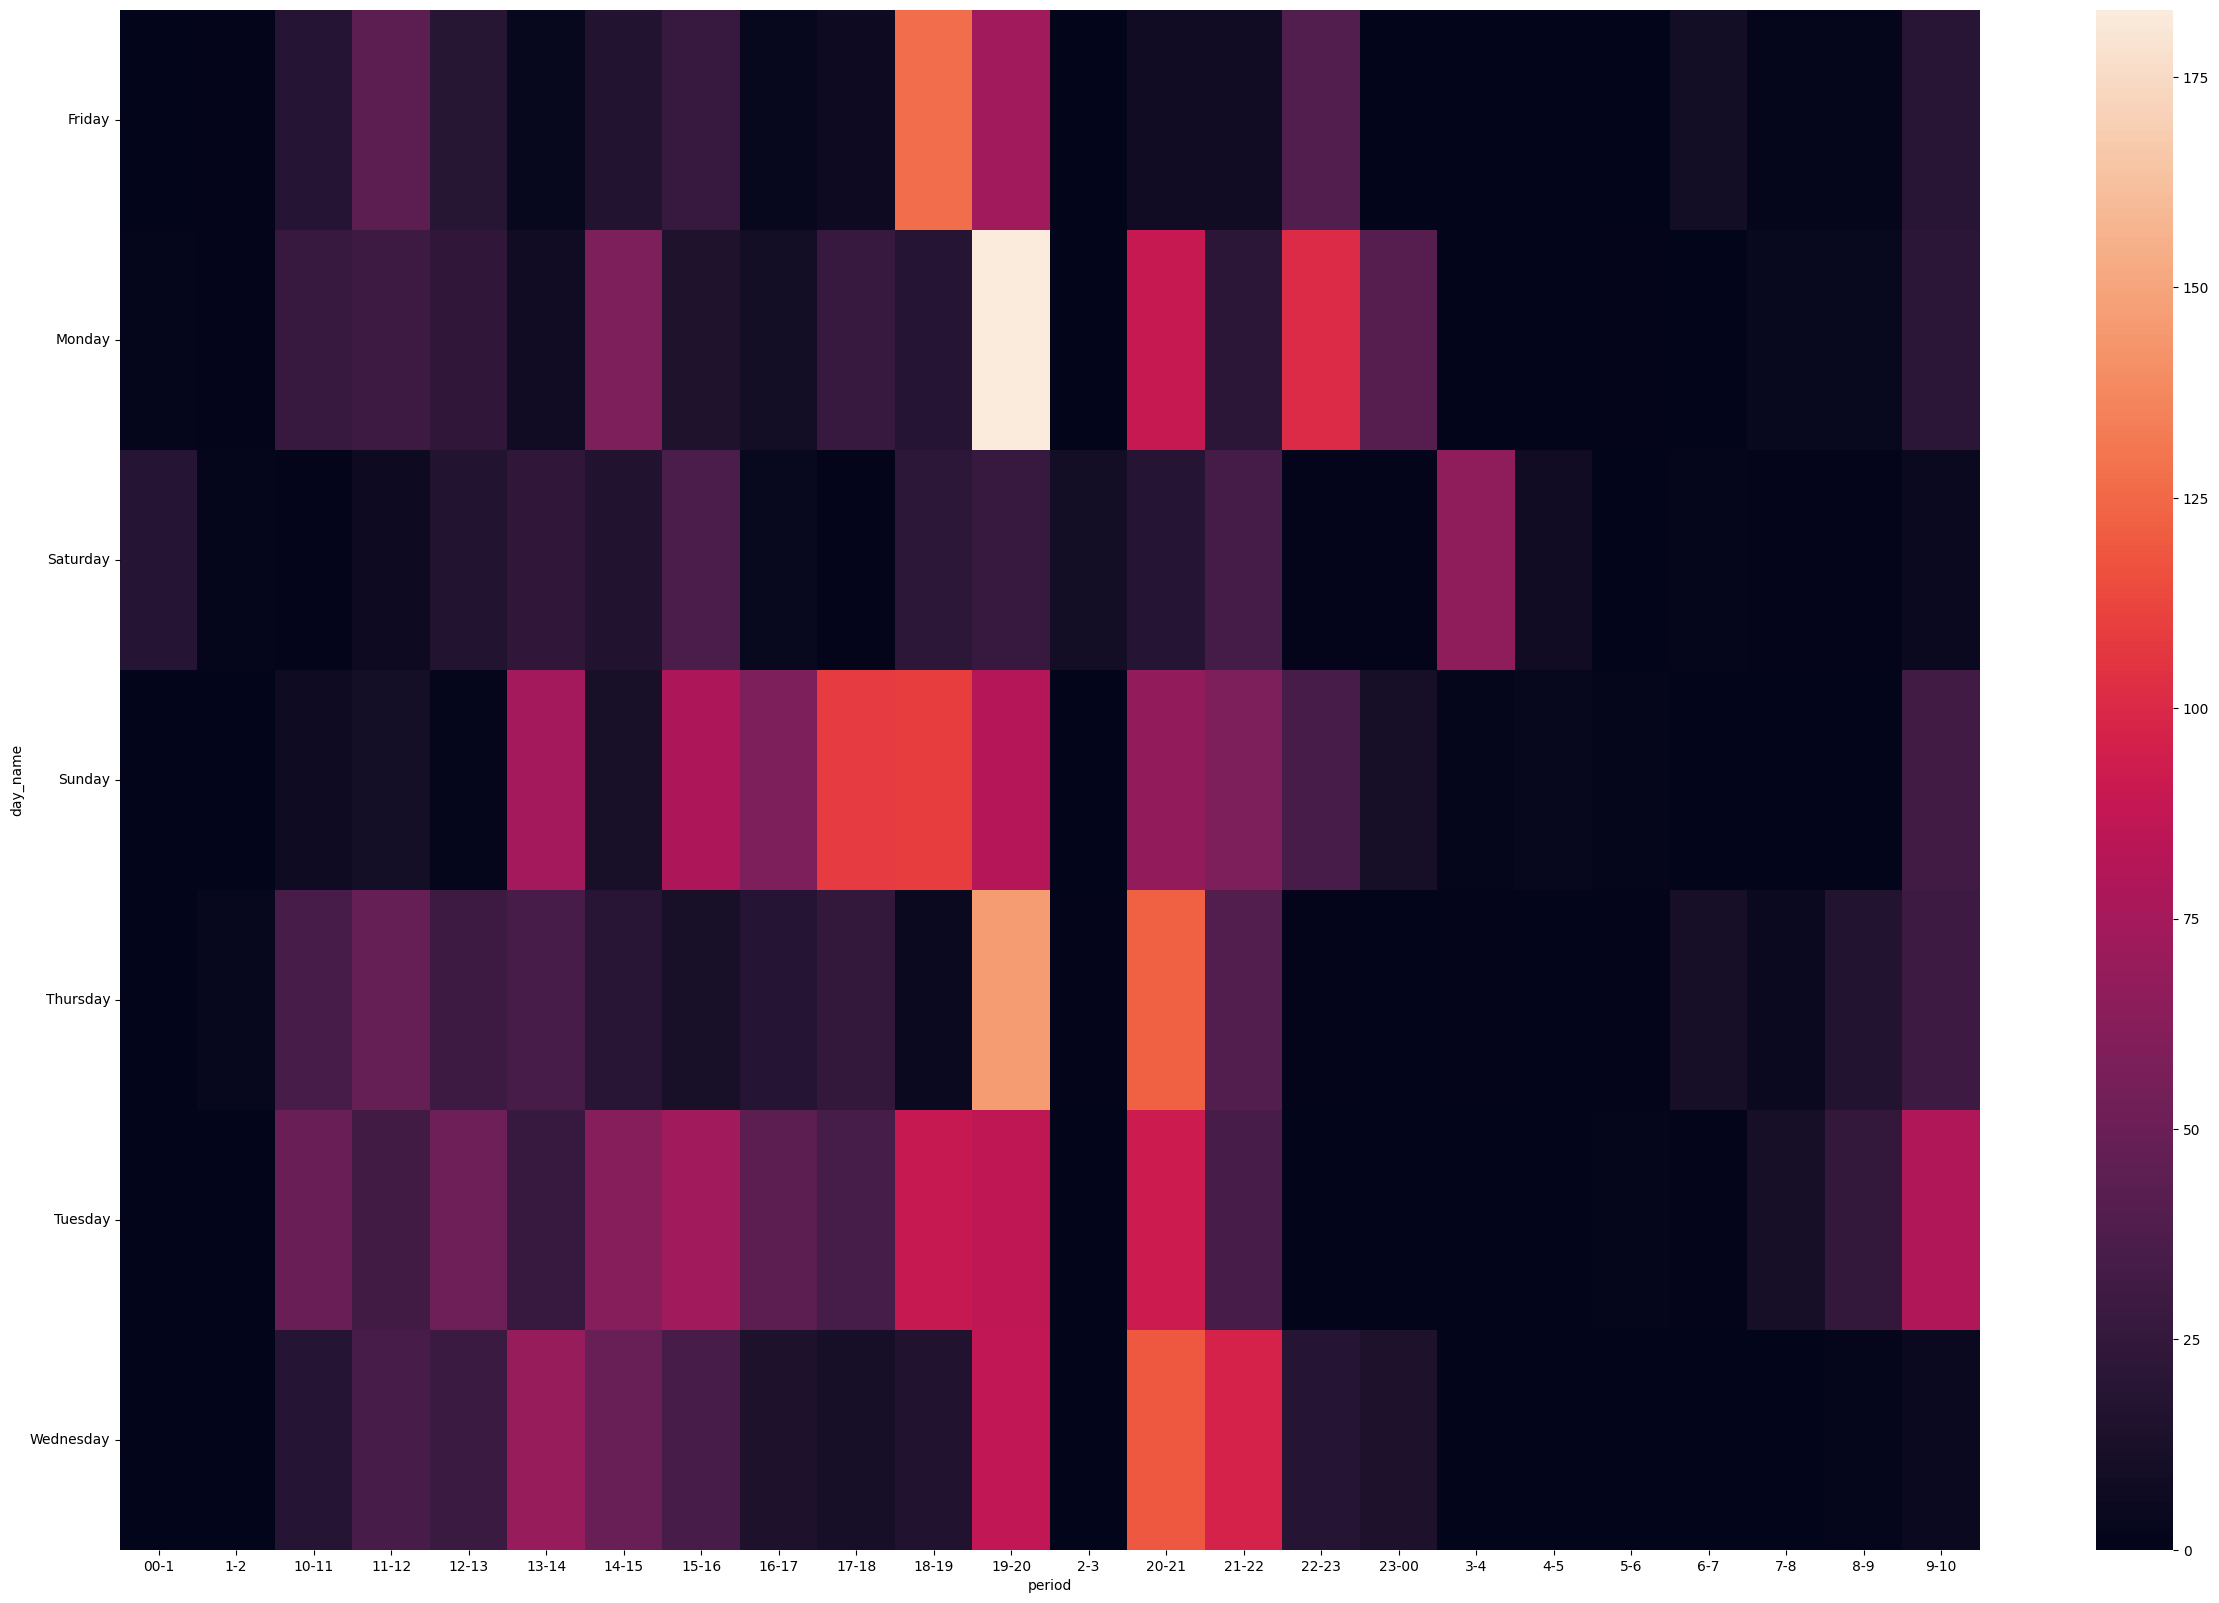

In [221]:
import seaborn as sns 
plt.figure(figsize = (20,6))
sns.heatmap(df.pivot_table(index = 'day_name', columns= 'period', values ='message', aggfunc='count').fillna(0))
plt.yticks(rotation= 'horizontal')
plt.show()